In [8]:
import selenium
from selenium.webdriver.common.by import By
from urllib3.util.retry import Retry
from requests.adapters import HTTPAdapter
from openpyxl import Workbook
from selenium.webdriver import ActionChains

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import pyautogui
import mouseinfo

import time
import datetime
import requests
import random


import os
import pandas as pd
from tqdm import tqdm

In [9]:
import urllib.request

## Data Load

In [10]:
pwd

'/Users/powerjsv/Desktop/project/capstone/Capstone-Model/Crawling/image'

In [11]:
rst_info = pd.read_csv("../data/df_광진구음식점_cleaned.csv",encoding='utf-8-sig')
menu_tmp = pd.read_csv("../data/restaurant_menu_광진구음식점.csv", encoding="utf-8-sig")

In [12]:
rst_info

,name,category,sub_category,address,contact,platform,url,opneing_hours
0,범가,0,중식당,서울 광진구 광장로 58-1 1층,010-3627-7041,0,https://map.naver.com/p/search/%EA%B4%91%EC%A7...,[]
1,비스타 워커힐 서울 피자힐,0,피자,서울 광진구 워커힐로 177 워커힐 호텔앤리조트,02-6330-9020,0,https://map.naver.com/p/search/%EA%B4%91%EC%A7...,[]
2,비스타 워커힐 서울 더뷔페,0,뷔페,서울 광진구 워커힐로 177 비스타 워커힐 서울 1층,02-6330-9015,0,https://map.naver.com/p/search/%EA%B4%91%EC%A7...,[]
3,비스타 워커힐 서울 명월관,0,"육류,고기요리",서울 광진구 워커힐로 177 워커힐 호텔앤리조트,02-6330-9050,0,https://map.naver.com/p/search/%EA%B4%91%EC%A7...,[]
4,어울림,0,"해물,생선요리",서울 광진구 광장로1나길 10,0507-1306-1470,0,https://map.naver.com/p/search/%EA%B4%91%EC%A7...,"['화 11:00 - 21:00 20:30 라스트오더', '수 11:00 - 21:..."
...,...,...,...,...,...,...,...,...
1234,미스사이공 건대점,0,베트남음식,서울 광진구 능동로11길 8-13 1층 미스사이공,0507-1370-0430,0,https://map.naver.com/p/search/%ED%99%94%EC%96...,"['월 11:00 - 21:30 21:00 라스트오더', '화 11:00 - 21:..."
1235,쭈꾸미도사 건대점,0,주꾸미요리,서울 광진구 동일로22길 94 1층 쭈꾸미도사,0507-1395-4504,0,https://map.naver.com/p/search/%ED%99%94%EC%96...,"['월 16:00 - 22:00 21:00 라스트오더', '화 16:00 - 22:..."
1236,밀플랜비 건국대점,0,핫도그,서울 광진구 광나루로24길 15 2층,0507-1310-8994,0,https://map.naver.com/p/search/%ED%99%94%EC%96...,"['월 10:30 - 21:30', '화 10:30 - 21:30', '수 10:3..."
1237,한촌설렁탕 건대입구역점,0,"곰탕,설렁탕",서울 광진구 아차산로 241,02-465-5860,0,https://map.naver.com/p/search/%ED%99%94%EC%96...,['매일 07:00 - 24:00']


In [13]:
menu_info

NameError: name 'menu_info' is not defined

## Chrome Driver Setting

In [14]:
options = Options()
# Chrome의 binary path 지정
options.binary_location = (
    "/Users/powerjsv/Desktop/Google Chrome.app/Contents/MacOS/Google Chrome"
)

# 불필요한 에러 메시지 삭제
options.add_experimental_option("excludeSwitches", ["enable-logging"])
# 최대화
options.add_argument("--start-maximized")
options.add_argument("--ignore-certificate-errors")
chrome_driver_path = (
    "/Users/powerjsv/Desktop/project/capstone/chromedriver-mac-arm64/chromedriver"
)

driver = webdriver.Chrome(chrome_driver_path, chrome_options=options)
driver.implicitly_wait(2)

/var/folders/9q/1dly5q8d5j9dmt8t1fwf05r80000gn/T/ipykernel_64693/2906874378.py:16: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_driver_path, chrome_options=options)


In [15]:
def create_folder(dir):
    try:
        if not os.path.exists(dir):
            os.makedirs(dir)
    except OSError:
        print('Create Folder Error !!!')

In [16]:
def switch_to_entry_iframe(driver):
    # 식당 탭으로 이동
    try:
        iframe = driver.find_element(By.CSS_SELECTOR, "iframe#entryIframe")
        driver.switch_to.frame(iframe)
        time.sleep(3)
        print("iframe 전환")
    except:
        print("iframe 전환 실패")

In [17]:
def switch_to_info_iframe(driver):
    # 전체 페이지로 복귀하도록 iframe에서 벗어나기 -> 그래야만 새로 생긴 iframe 탭에 접근할 수 있음
    driver.switch_to.default_content()
    time.sleep(0.5)

    # 새로 생긴 식당 탭 iframe으로 전환
    iframe = driver.find_element(By.CSS_SELECTOR, "#entryIframe")
    driver.switch_to.frame(iframe)
    time.sleep(1)

In [11]:
img_url = driver.find_element(
    By.CSS_SELECTOR,
    "div.content_inner > div.photo_area > img",
).get_attribute("src")

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"div.content_inner > div.photo_area > img"}
  (Session info: chrome=124.0.6367.92)


In [31]:
img_url = img_url.replace("https", "http")
opener = urllib.request.build_opener()
opener.addheaders = [('User-Agent', 'Mozilla/5.0')] # https://docs.python.org/3/library/urllib.request.html 참고
urllib.request.install_opener(opener)
urllib.request.urlretrieve(img_url, f'test/test.png') # url을 

In [58]:
create_folder(f"./test")

In [87]:
driver.find_element(By.CSS_SELECTOR, "body > div.sc-1s1ma4y.edqMkr > div > button").click()

In [18]:
menu_info=menu_tmp.copy()

In [19]:
menu_info

,rst_name,menu_name,price
0,어울림,새조개 샤브샤브,45000
1,어울림,하모 샤브샤브,45000
2,어울림,매생이굴국밥,10000
3,어울림,메밀막국수,9000
4,어울림,메밀비빔국수,9000
...,...,...,...
9989,하남돼지집 세종대점,커플세트(삼겹살2+목살1+된장찌개+도시락김치볶음밥)(2~3인분),54000
9990,하남돼지집 세종대점,패밀리세트(삼겹살2+목살2+우삼겹된장+도시락김치볶음밥)(3~4인분),75000
9991,하남돼지집 세종대점,김치찌개(1인분),7000
9992,하남돼지집 세종대점,고추장찌개(1인분),7000


In [20]:
import numpy as np

# 예비코드를 위한 랜덤 순위작업

In [21]:
menu_info["rank"] = menu_info.groupby("rst_name")["menu_name"].transform(
    lambda x: np.random.permutation(np.arange(1, len(x) + 1))
)

print(menu_info)

        rst_name                              menu_name  price  rank
0            어울림                               새조개 샤브샤브  45000     9
1            어울림                                하모 샤브샤브  45000     6
2            어울림                                 매생이굴국밥  10000     3
3            어울림                                  메밀막국수   9000     5
4            어울림                                 메밀비빔국수   9000     2
...          ...                                    ...    ...   ...
9989  하남돼지집 세종대점    커플세트(삼겹살2+목살1+된장찌개+도시락김치볶음밥)(2~3인분)  54000     5
9990  하남돼지집 세종대점  패밀리세트(삼겹살2+목살2+우삼겹된장+도시락김치볶음밥)(3~4인분)  75000     7
9991  하남돼지집 세종대점                              김치찌개(1인분)   7000     6
9992  하남돼지집 세종대점                             고추장찌개(1인분)   7000    11
9993  하남돼지집 세종대점                          우삼겹 된장찌개(1인분)   7000     9

[9994 rows x 4 columns]


In [22]:
rst_url_info=rst_info[['name','url']]

In [23]:
top_menus=menu_info[menu_info['rank'].isin([1,2,3])]
top_menus

,rst_name,menu_name,price,rank
2,어울림,매생이굴국밥,10000,3
4,어울림,메밀비빔국수,9000,2
7,어울림,부추전,9000,1
9,그랜드 워커힐 서울 금룡,진계도 셰프 코스,260000,2
10,그랜드 워커힐 서울 금룡,도 코스,190000,3
...,...,...,...,...
9976,한촌설렁탕 건대입구역점,김치전,12000,3
9981,한촌설렁탕 건대입구역점,불고기4인+설렁탕육수(4봉),60000,2
9983,하남돼지집 세종대점,모듬한판,47000,1
9985,하남돼지집 세종대점,한돈 생삼겹살(1인분(180g)),16000,3


In [24]:
result = pd.merge(top_menus, rst_url_info, left_on="rst_name", right_on="name", how="left")
result.drop(columns='name',inplace=True)

In [25]:
result

,rst_name,menu_name,price,rank,url
0,어울림,매생이굴국밥,10000,3,https://map.naver.com/p/search/%EA%B4%91%EC%A7...
1,어울림,메밀비빔국수,9000,2,https://map.naver.com/p/search/%EA%B4%91%EC%A7...
2,어울림,부추전,9000,1,https://map.naver.com/p/search/%EA%B4%91%EC%A7...
3,그랜드 워커힐 서울 금룡,진계도 셰프 코스,260000,2,https://map.naver.com/p/search/%EA%B4%91%EC%A7...
4,그랜드 워커힐 서울 금룡,도 코스,190000,3,https://map.naver.com/p/search/%EA%B4%91%EC%A7...
...,...,...,...,...,...
2806,한촌설렁탕 건대입구역점,김치전,12000,3,https://map.naver.com/p/search/%ED%99%94%EC%96...
2807,한촌설렁탕 건대입구역점,불고기4인+설렁탕육수(4봉),60000,2,https://map.naver.com/p/search/%ED%99%94%EC%96...
2808,하남돼지집 세종대점,모듬한판,47000,1,https://map.naver.com/p/search/%ED%99%94%EC%96...
2809,하남돼지집 세종대점,한돈 생삼겹살(1인분(180g)),16000,3,https://map.naver.com/p/search/%ED%99%94%EC%96...


In [26]:
result.loc[0,'url']

'https://map.naver.com/p/search/%EA%B4%91%EC%A7%84%EA%B5%AC%20%EA%B4%91%EC%9E%A5%EB%8F%99%20%EC%9D%8C%EC%8B%9D%EC%A0%90/place/1278208632?c=15.00,0,0,0,dh&placePath=%3Fentry%253Dbmp'

### 예제 sample에 대한 이미지 크롤링

In [27]:
# app-root > div > div > div > div:nth-child(6) > div:nth-child(2) > div.place_section.no_margin > div > ul > li:nth-child(1) > a > div.MXkFw > div.meDTN > div > span

In [30]:
url=''
cnt=0
for rst_name, group in result.groupby("rst_name"):
    if cnt>=3:
        break
    url=group['url'].iloc[0]
    driver.get(url)
    # iframe 전환
    switch_to_entry_iframe(driver)
    # 메뉴 탭 클릭
    driver.find_element(
        By.CSS_SELECTOR,
        "div.place_fixed_maintab> div > div > div > div > a:nth-child(3) > span",
    ).click()
    # 메뉴 리스트
    menus = driver.find_elements(
        By.CSS_SELECTOR,
        "div.MXkFw > div.meDTN",
    )
    menu_len=len(menus)
    print(f'menu length: {menu_len}')
    for index, row in group.iterrows():
        menu_cnt=0
        while menu_cnt<menu_len:
            switch_to_entry_iframe(driver)
            menus = driver.find_elements(
                By.CSS_SELECTOR,
                "div.MXkFw > div.meDTN",
            )
            print(f"menu : {menus[menu_cnt].text}")
            print(f"row_menuname : {row['menu_name']}")
            if row['menu_name'] == menus[menu_cnt].text:
                menus[menu_cnt].click()
                driver.find_element(By.CSS_SELECTOR, "div.r5lYb").click()

                driver.switch_to.default_content()
                img_url = driver.find_element(
                    By.CSS_SELECTOR,
                    "div.photo_area > img",
                ).get_attribute("src")
                img_url = img_url.replace("https", "http")
                opener = urllib.request.build_opener()
                opener.addheaders = [
                    ("User-Agent", "Mozilla/5.0")
                ]  # https://docs.python.org/3/library/urllib.request.html 참고
                urllib.request.install_opener(opener)
                urllib.request.urlretrieve(img_url, f"test/{group['rst_name'].iloc[0]}_{row['menu_name']}_{row['rank']}.png")  # url을

                print("image_download")
                time.sleep(1)
                driver.back()

                print(menu_cnt)
            menu_cnt += 1
            driver.switch_to.default_content()
    driver.switch_to.default_content()
    time.sleep(0.5)
    cnt+=1

iframe 전환
menu length: 0
iframe 전환
menu length: 7
iframe 전환 실패
menu : 한우황소곱창 200g
row_menuname : 한우황소곱창 200g
image_download
0
iframe 전환
menu : 한우대창 220g
row_menuname : 한우황소곱창 200g
iframe 전환
menu : 한우막창(홍창) 220g
row_menuname : 한우황소곱창 200g
iframe 전환
menu : 생모듬(2인)
row_menuname : 한우황소곱창 200g
iframe 전환
menu : 생모듬(3인)
row_menuname : 한우황소곱창 200g
iframe 전환
menu : 생모듬(4인)
row_menuname : 한우황소곱창 200g
iframe 전환
menu : 한우벌집(벌양) 200g
row_menuname : 한우황소곱창 200g
iframe 전환
menu : 한우황소곱창 200g
row_menuname : 한우대창 220g
iframe 전환
menu : 한우대창 220g
row_menuname : 한우대창 220g
image_download
1
iframe 전환
menu : 한우막창(홍창) 220g
row_menuname : 한우대창 220g
iframe 전환
menu : 생모듬(2인)
row_menuname : 한우대창 220g
iframe 전환
menu : 생모듬(3인)
row_menuname : 한우대창 220g
iframe 전환
menu : 생모듬(4인)
row_menuname : 한우대창 220g
iframe 전환
menu : 한우벌집(벌양) 200g
row_menuname : 한우대창 220g
iframe 전환
menu : 한우황소곱창 200g
row_menuname : 한우막창(홍창) 220g
iframe 전환
menu : 한우대창 220g
row_menuname : 한우막창(홍창) 220g
iframe 전환
menu : 한우막창(홍창) 220g
row_menuname : 한우막

In [34]:
rst_name
group

,rst_name,menu_name,price,rank,url
1677,A TABLE,고등어구이,12000,1,https://map.naver.com/p/search/%EC%9E%90%EC%96...
1678,A TABLE,된장찌개,9000,2,https://map.naver.com/p/search/%EC%9E%90%EC%96...
1679,A TABLE,김치찌개,9000,3,https://map.naver.com/p/search/%EC%9E%90%EC%96...


In [32]:
menu_cnt

0

In [31]:
cnt

3

In [37]:
switch_to_entry_iframe(driver)

iframe 전환 실패


In [1]:
driver.switch_to.default_content()

NameError: name 'driver' is not defined

In [1]:
row["menu_name"]

NameError: name 'row' is not defined

In [ ]:
menus[menu_cnt].text

In [38]:
menus = driver.find_elements(
    By.CSS_SELECTOR,
    "div.MXkFw > div.meDTN",
)
menus

[<selenium.webdriver.remote.webelement.WebElement (session="2381037541f3f29df79758328eb4ba5b", element="f.80A4104361FE0AA6D79223A0932B1983.d.F2D85821BD7630462CD94BED690C37EB.e.18534")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2381037541f3f29df79758328eb4ba5b", element="f.80A4104361FE0AA6D79223A0932B1983.d.F2D85821BD7630462CD94BED690C37EB.e.18553")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2381037541f3f29df79758328eb4ba5b", element="f.80A4104361FE0AA6D79223A0932B1983.d.F2D85821BD7630462CD94BED690C37EB.e.18572")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2381037541f3f29df79758328eb4ba5b", element="f.80A4104361FE0AA6D79223A0932B1983.d.F2D85821BD7630462CD94BED690C37EB.e.18591")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2381037541f3f29df79758328eb4ba5b", element="f.80A4104361FE0AA6D79223A0932B1983.d.F2D85821BD7630462CD94BED690C37EB.e.18610")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2381037541

<html lang="ko"><head><meta charset="utf-8"><meta name="viewport" content="width=device-width,initial-scale=1"><meta property="og:type" content="website"><meta name="referrer" content="always"><title>60년전통신촌황소곱창 건대직영점 - 네이버 지도</title><meta data-rh="true" name="Description" content="공간을 검색합니다. 생활을 연결합니다. 장소, 버스, 지하철, 도로 등 모든 공간의 정보를 하나의 검색으로 연결한 새로운 지도를 만나보세요."><meta data-rh="true" property="og:description" content="공간을 검색합니다. 생활을 연결합니다. 장소, 버스, 지하철, 도로 등 모든 공간의 정보를 하나의 검색으로 연결한 새로운 지도를 만나보세요."><meta data-rh="true" property="twitter:description" content="공간을 검색합니다. 생활을 연결합니다. 장소, 버스, 지하철, 도로 등 모든 공간의 정보를 하나의 검색으로 연결한 새로운 지도를 만나보세요."><meta data-rh="true" property="og:image" content="https://search.pstatic.net/common/?src=https%3A%2F%2Fssl.pstatic.net%2Fstatic%2Fmaps%2Fv5%2Fpc%2Fnaver-map.png&amp;type=f&amp;size=1200x630&amp;quality=80&amp;opt=2"><meta data-rh="true" property="twitter:image" content="https://search.pstatic.net/common/?src=https%3A%2F%2Fssl.pstatic.net%2Fstatic%2Fmaps%2Fv5
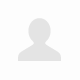
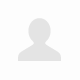

In [33]:
print(driver.page_source)

In [86]:
for rst_name, group in result.groupby("rst_name"):
    print(group['url'].iloc[0])
    print("zz")
    # 각 메뉴에 대해 작업 B 수행
    for index, row in group.iterrows():
        print(f"  {row}")
        print("-----------------------------")

https://map.naver.com/p/search/%EA%B4%91%EC%A7%84%EA%B5%AC%20%EA%B5%B0%EC%9E%90%EB%8F%99%20%EC%9D%8C%EC%8B%9D%EC%A0%90/place/18837249?c=14.00,0,0,0,dh&placePath=%3Fentry%253Dbmp
zz
  rst_name                                       1982도시락&컵밥 세종대점
menu_name                                                제육도시락
price                                                     8500
rank                                                         2
url          https://map.naver.com/p/search/%EA%B4%91%EC%A7...
Name: 1187, dtype: object
-----------------------------
  rst_name                                       1982도시락&컵밥 세종대점
menu_name                                             소불고기 도시락
price                                                     9500
rank                                                         1
url          https://map.naver.com/p/search/%EA%B4%91%EC%A7...
Name: 1188, dtype: object
-----------------------------
  rst_name                                       1982도시락&컵밥 세종대점
menu_nam

In [80]:
result

,rst_name,menu_name,price,rank,url
0,어울림,새조개 샤브샤브,45000,1,https://map.naver.com/p/search/%EA%B4%91%EC%A7...
1,어울림,매생이굴국밥,10000,3,https://map.naver.com/p/search/%EA%B4%91%EC%A7...
2,어울림,메밀막국수,9000,2,https://map.naver.com/p/search/%EA%B4%91%EC%A7...
3,그랜드 워커힐 서울 금룡,진계도 셰프 코스,260000,2,https://map.naver.com/p/search/%EA%B4%91%EC%A7...
4,그랜드 워커힐 서울 금룡,원 코스,360000,1,https://map.naver.com/p/search/%EA%B4%91%EC%A7...
...,...,...,...,...,...
2806,한촌설렁탕 건대입구역점,알뜰탕 세트 3 (2인셋트),28000,3,https://map.naver.com/p/search/%ED%99%94%EC%96...
2807,한촌설렁탕 건대입구역점,서울식 불고기(2인)(2인),30000,2,https://map.naver.com/p/search/%ED%99%94%EC%96...
2808,하남돼지집 세종대점,모듬한판,47000,1,https://map.naver.com/p/search/%ED%99%94%EC%96...
2809,하남돼지집 세종대점,실속 1인 세트(고기1.5인분+된장찌개)(1.5인분),25000,2,https://map.naver.com/p/search/%ED%99%94%EC%96...


In [74]:
for rst_name, group in result.groupby('rst_name'):
    print(f"작업 A 수행: 식당 이름 = {rst_name}, 주소 = {group['url'].iloc[0]}")
    # 각 메뉴에 대해 작업 B 수행
    for index, row in group.iterrows():
        print(f"  작업 B 수행: 메뉴 이름 = {row['menu_name']}")

작업 A 수행: 식당 이름 = 1982도시락&컵밥 세종대점, 주소 = https://map.naver.com/p/search/%EA%B4%91%EC%A7%84%EA%B5%AC%20%EA%B5%B0%EC%9E%90%EB%8F%99%20%EC%9D%8C%EC%8B%9D%EC%A0%90/place/18837249?c=14.00,0,0,0,dh&placePath=%3Fentry%253Dbmp
  작업 B 수행: 메뉴 이름 = 제육도시락
  작업 B 수행: 메뉴 이름 = 소불고기 도시락
  작업 B 수행: 메뉴 이름 = 고추장삼겹살 도시락
작업 A 수행: 식당 이름 = 60년전통신촌황소곱창 건대직영점, 주소 = https://map.naver.com/p/search/%ED%99%94%EC%96%91%EB%8F%99%20%EC%9D%8C%EC%8B%9D%EC%A0%90/place/1963211814?c=15.00,0,0,0,dh&placePath=%3Fentry%253Dbmp
  작업 B 수행: 메뉴 이름 = 한우황소곱창 200g
  작업 B 수행: 메뉴 이름 = 한우대창 220g
  작업 B 수행: 메뉴 이름 = 한우벌집(벌양) 200g
작업 A 수행: 식당 이름 = 9공탄, 주소 = https://map.naver.com/p/search/%EA%B5%AC%EC%9D%98%EB%8F%99%20%EC%9D%8C%EC%8B%9D%EC%A0%90/place/32891366?c=14.00,0,0,0,dh&placePath=%3Fentry%253Dbmp
  작업 B 수행: 메뉴 이름 = 돼지왕갈비 380g
  작업 B 수행: 메뉴 이름 = 항정살 200g
  작업 B 수행: 메뉴 이름 = 열무국수
작업 A 수행: 식당 이름 = A TABLE, 주소 = https://map.naver.com/p/search/%EC%9E%90%EC%96%91%EB%8F%99%20%EC%9D%8C%EC%8B%9D%EC%A0%90/place/36286079?c=13.00,0,0,0,dh&placePa